   Clump  UnifSize  UnifShape  MargAdh  SingEpiSize  BareNuc  BlandChrom  \
0      5         1          1        1            2        1           3   
1      5         4          4        5            7       10           3   
2      3         1          1        1            2        2           3   
3      6         8          8        1            3        4           3   
4      4         1          1        3            2        1           3   

   NormNucl  Mit  Class  
0         1    1      0  
1         2    1      0  
2         1    1      0  
3         7    1      0  
4         1    1      0  
Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')
Accuracy: 0.9463414634146341
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       127
           1       0.96      0.90      0.93        78

    accuracy        

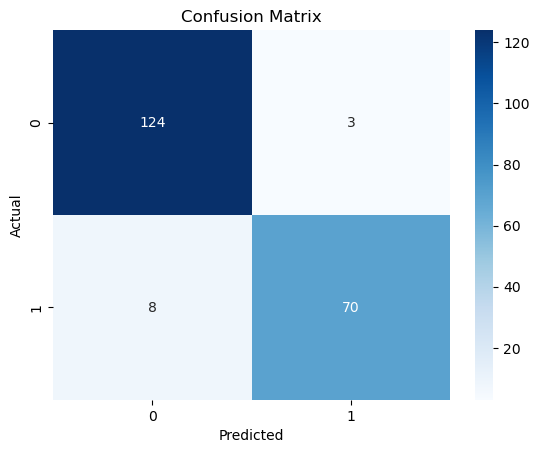

In [1]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset from the provided URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/tumor.csv"
data = pd.read_csv(url)

# Step 2: Explore the dataset
# Display the first few rows and column names to verify the structure
print(data.head())
print(data.columns)

# Step 3: Select features and target variable
# Drop 'id' and other non-feature columns, using 'diagnosis' as the target
X = data.drop(columns=['Class'])  # Remove any irrelevant columns like 'id'
y = data['Class']  # The target column indicating benign or malignant diagnosis

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Initialize and train the Decision Tree model
# Create a Decision Tree Classifier and fit it on the training data
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
# Predict on the test set and evaluate the results
y_pred = model.predict(X_test)

# Print the accuracy and classification metrics for the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Visualize the Confusion Matrix
# Generate a heatmap of the confusion matrix for better visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

